In [76]:
# import deps 
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [77]:
# load test data
test_data = pd.read_csv('OliveOil/OliveOil_TEST.csv')
# load train data
train_data = pd.read_csv('OliveOil/OliveOil_TRAIN.csv')

# split data into X and y
X_train = train_data.iloc[:, 1:570]
y_train = train_data.iloc[:, 571]

X_test = test_data.iloc[:, 1:570]
y_test = test_data.iloc[:, 571]

y_test[0:10]

0    1
1    1
2    1
3    1
4    1
5    2
6    2
7    2
8    2
9    2
Name: Unnamed: 571, dtype: int64

In [78]:
# Entraînement des différents modèles
models = []

# Naive Bayesian
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
models.append({
    'name': 'Naive Bayesian',
    'model': nb_model
})

# k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
models.append({
    'name': 'k-NN',
    'model': knn_model
})

# Arbre de décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
models.append({
    'name': 'Arbre de décision',
    'model': dt_model
})

# Réseau de neurones artificiels (ANN)
ann_model = MLPClassifier(random_state=42)
ann_model.fit(X_train, y_train)
models.append({
    'name': 'Réseau de neurones artificiels (ANN)',
    'model': ann_model
})

# Réseau de neurones artificiels (ANN) avec hidden_layer_sizes=(100, 100)
ann_model_tanh = MLPClassifier(random_state=42, hidden_layer_sizes=(100, 100))
ann_model_tanh.fit(X_train, y_train)
models.append({
    'name': 'Réseau de neurones artificiels (ANN) (100, 100)',
    'model': ann_model_tanh
})

/Users/taher/.pyenv/versions/3.9.8/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/taher/.pyenv/versions/3.9.8/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
# Évaluation des performances des différents modèles sur l'ensemble de test
for model in models:
    y_pred = model['model'].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"Modèle {model['name']}:")
    print(f"Rappel : {recall}")
    print(f"F1-score : {f1}")
    print(f"Accuracy : {accuracy}")
    print("")

Modèle Naive Bayesian:
Rappel : 0.9
F1-score : 0.8990253411306043
Accuracy : 0.9

Modèle k-NN:
Rappel : 0.8333333333333334
F1-score : 0.7753246753246753
Accuracy : 0.8333333333333334

Modèle Arbre de décision:
Rappel : 0.8666666666666667
F1-score : 0.858230127360562
Accuracy : 0.8666666666666667

Modèle Réseau de neurones artificiels (ANN):
Rappel : 0.4666666666666667
F1-score : 0.35596491228070176
Accuracy : 0.4666666666666667

Modèle Réseau de neurones artificiels (ANN) (100, 100):
Rappel : 0.6
F1-score : 0.5601169590643276
Accuracy : 0.6



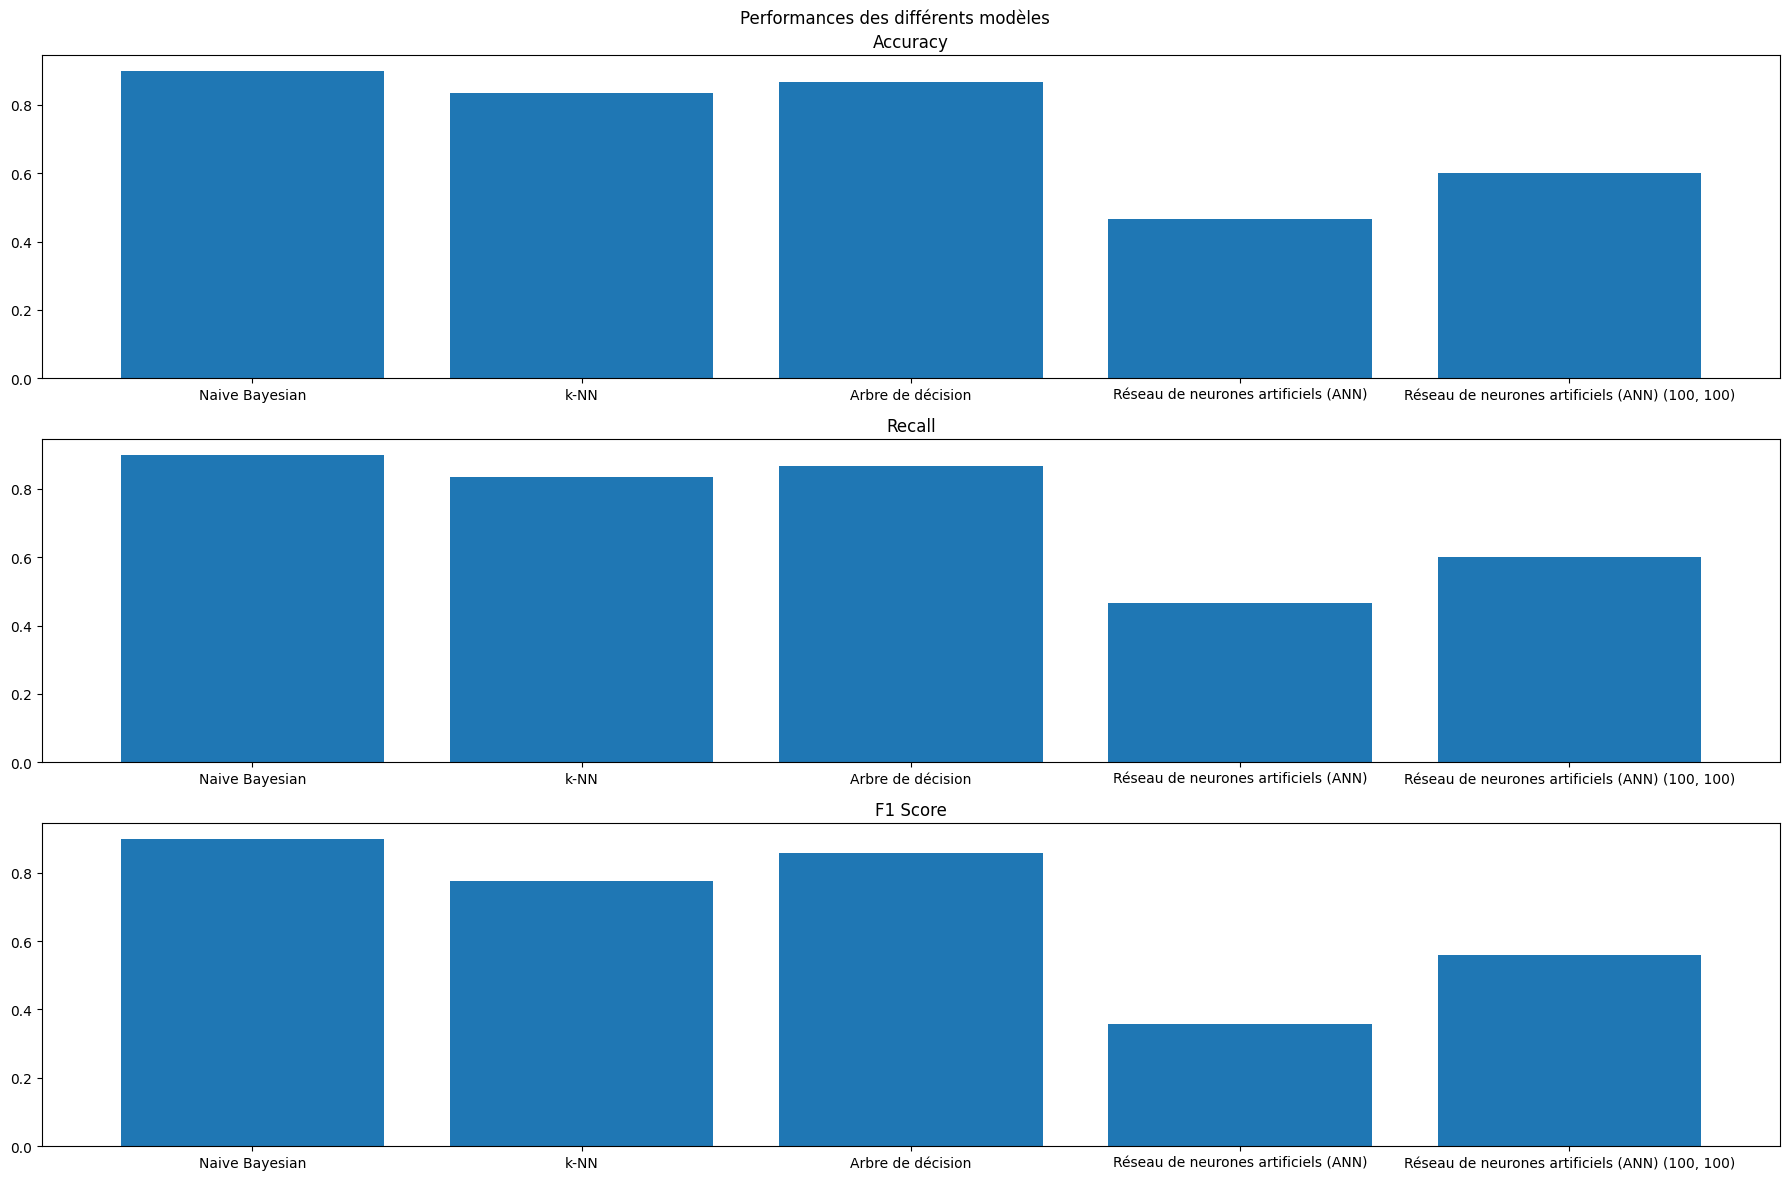

In [80]:
# Créer des listes de performances pour chaque mesure et chaque modèle
accuracies = []
recalls = []
f1_scores = []

for model in models:
    y_pred = model['model'].predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Définir les noms des modèles pour l'axe X
model_names = [model['name'] for model in models]

# Créer un graphique à barres pour chaque mesure de performance
fig, axs = plt.subplots(3, 1, figsize=(18, 12))
axs[0].bar(model_names, accuracies)
axs[0].set_title('Accuracy')
axs[1].bar(model_names, recalls)
axs[1].set_title('Recall')
axs[2].bar(model_names, f1_scores)
axs[2].set_title('F1 Score')

# Ajouter une légende et des étiquettes d'axe
fig.suptitle('Performances des différents modèles')
plt.tight_layout()

# Afficher le graphique
plt.show()